In [1]:
cd

/Users/mdjavedulferdous


In [2]:
cd "Documents/Dataset/New Dataset"

/Users/mdjavedulferdous/Documents/Dataset/New Dataset


In [15]:
import csv
import numpy as np
import pandas as pd
from numpy import mean
from numpy import std
from sklearn import svm
from sklearn import tree
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import KFold,cross_val_predict
from sklearn.metrics import precision_score, average_precision_score,confusion_matrix, recall_score, accuracy_score, classification_report, make_scorer
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as PLT


In [4]:
#csv_df = pd.read_csv("sort_file_corrected_v4.csv")
#csv_df = pd.read_csv("test_div_2_2.csv")
csv_df = pd.read_csv("pageList_version_three.csv")


In [5]:
csv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149146 entries, 0 to 149145
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   NumOfButton     149146 non-null  int64 
 1   NumOfLinks      149146 non-null  int64 
 2   commonURL       149146 non-null  int64 
 3   is_page         149146 non-null  int64 
 4   NumberOfValues  149146 non-null  int64 
 5   pageClass       149146 non-null  int64 
 6   name_url        149146 non-null  object
dtypes: int64(6), object(1)
memory usage: 8.0+ MB


In [6]:
X = csv_df[['NumOfButton','NumOfLinks','commonURL','NumberOfValues','is_page']]
y = csv_df[['pageClass']]


In [7]:
filtered_one = csv_df[csv_df['pageClass'] != 0] 
filtered_zero = csv_df[csv_df['pageClass'] == 0] 


In [8]:
print(filtered_zero.count())
print(filtered_one.count())

NumOfButton       148937
NumOfLinks        148937
commonURL         148937
is_page           148937
NumberOfValues    148937
pageClass         148937
name_url          148937
dtype: int64
NumOfButton       209
NumOfLinks        209
commonURL         209
is_page           209
NumberOfValues    209
pageClass         209
name_url          209
dtype: int64


In [9]:
f_o = filtered_zero.sample(n=209,replace=False)
z = pd.concat([filtered_one, f_o], axis=0)
x_2 = z[['NumOfButton','NumOfLinks','commonURL','NumberOfValues','is_page']]
y_2 = z[["pageClass"]]

In [10]:
print(x_2.count())
print(y_2.count())

NumOfButton       418
NumOfLinks        418
commonURL         418
NumberOfValues    418
is_page           418
dtype: int64
pageClass    418
dtype: int64


In [12]:
'''
Parameters:

estimator: estimator object implementing ‘fit’

X: Xarray-like of shape (n_samples, n_features). The data to fit. Can be for example a list, or an array.

y: yarray-like of shape (n_samples,) or (n_samples, n_outputs), default=None. The target variable to try to predict in the case of supervised learning.

'''

cv = KFold(n_splits=3, random_state=1, shuffle=True)
target_names = ['Class 0', 'Class 1']

model = LogisticRegression()
model2 = svm.SVC(kernel='rbf')

def classification_report_with_accuracy_score(y_true, y_pred):

    print("--------------------------------------------------------")
    print(metrics.classification_report(y_true, y_pred, digits=2, target_names=target_names))
    #print(confusion_matrix(y_true, y_pred))
    tp, fn, fp, tn = confusion_matrix(y_true, y_pred).reshape(-1)
    print('Outcome values : \ntp, fn, fp, tn\n', tp, fn, fp, tn)
    return accuracy_score(y_true, y_pred)

print("========================================================")
print("LogisticRegression")
print("========================================================")
lgnested_score = cross_val_score(model, X=x_2, y=y_2, cv=cv, \
               scoring=make_scorer(classification_report_with_accuracy_score))
lgavg_score = "{:.3f}".format(np.mean(lgnested_score)*100)
print("Average accuracy: ", lgavg_score)

print("========================================================")
print("SVM with RBF kernel")
print("========================================================")
'''
fig = PLT.figure()
ax1 = fig.add_subplot(211)
ax1.plot(lgnested_score)
PLT.show()
'''
dtnested_score = cross_val_score(model2, X=x_2, y=y_2, cv=cv, \
               scoring=make_scorer(classification_report_with_accuracy_score))
dtavg_score = "{:.3f}".format(np.mean(dtnested_score)*100)
print("Average accuracy: ", dtavg_score)
print("========================================================")
'''
fig = PLT.figure()
ax2 = fig.add_subplot(211)
ax2.plot(dtnested_score)
PLT.show()
'''

LogisticRegression
--------------------------------------------------------
              precision    recall  f1-score   support

     Class 0       0.82      1.00      0.90        75
     Class 1       1.00      0.75      0.86        65

    accuracy                           0.89       140
   macro avg       0.91      0.88      0.88       140
weighted avg       0.91      0.89      0.88       140

Outcome values : 
tp, fn, fp, tn
 75 0 16 49
--------------------------------------------------------
              precision    recall  f1-score   support

     Class 0       0.81      1.00      0.89        68
     Class 1       1.00      0.77      0.87        71

    accuracy                           0.88       139
   macro avg       0.90      0.89      0.88       139
weighted avg       0.91      0.88      0.88       139

Outcome values : 
tp, fn, fp, tn
 68 0 16 55
--------------------------------------------------------
              precision    recall  f1-score   support

     Class 

/Users/mdjavedulferdous/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mdjavedulferdous/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mdjavedulferdous/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mdjavedulferdous/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expec

'\nfig = PLT.figure()\nax2 = fig.add_subplot(211)\nax2.plot(dtnested_score)\nPLT.show()\n'

--------------------------------------------------------
              precision    recall  f1-score   support

     Class 0       0.83      1.00      0.91        59
     Class 1       1.00      0.77      0.87        53

    accuracy                           0.89       112
   macro avg       0.92      0.89      0.89       112
weighted avg       0.91      0.89      0.89       112

Outcome values : 
tp, fn, fp, tn
 59 0 12 41
--------------------------------------------------------
              precision    recall  f1-score   support

     Class 0       0.77      1.00      0.87        47
     Class 1       1.00      0.78      0.88        64

    accuracy                           0.87       111
   macro avg       0.89      0.89      0.87       111
weighted avg       0.90      0.87      0.87       111

Outcome values : 
tp, fn, fp, tn
 47 0 14 50
--------------------------------------------------------
              precision    recall  f1-score   support

     Class 0       0.93      1

/Users/mdjavedulferdous/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Users/mdjavedulferdous/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mdjavedulferdous/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mdjavedulferdous/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was p

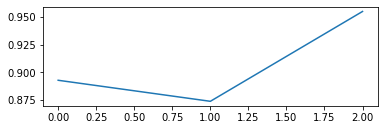

In [19]:
X_train,X_validation, Y_train, Y_validation = model_selection.train_test_split(x_2,y_2,test_size=0.20)
models = []
models.append(('LogisticRegression', LogisticRegression()))
#models.append(('KNN', KNeighborsClassifier()))
#models.append(('SVM', svm.SVC(kernel='rbf')))
results = []
names = []
print("================================================================")
for name, model in models:
    kfold = KFold(n_splits=3, random_state=0)
    clf = model.fit(X_train, Y_train)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=make_scorer(classification_report_with_accuracy_score))
    results.append(cv_results)
    names.append(name)
    #print("================================================================")
    #print("Average scores of the estimator for each run of the cross validation.")
    msg = "Testing score for %s: is %f" % (name, cv_results.mean()*100)
    #print(msg)
    #print("================================================================")
    #print("The set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.")
    print("%s is %f" % (name , accuracy_score(Y_validation, model.predict(X_validation))*100))
    print("================================================================")
    prediction = clf.predict(X_validation)
    print ('Recall:', recall_score(Y_validation, prediction))
    print ('Precision:', precision_score(Y_validation, prediction) )  
    fig = PLT.figure()
    ax1 = fig.add_subplot(211)
    ax1.plot(cv_results)
    PLT.show()

https://github.com/Msanjayds/Machine_Learning_Projects/blob/master/2.%20CrossValidation.ipynb
    
https://towardsdatascience.com/why-and-how-to-cross-validate-a-model-d6424b45261f
    
https://stackoverflow.com/questions/42263915/using-sklearn-cross-val-score-and-kfolds-to-fit-and-help-predict-model